###### George Kwakye

# REGRESSION PROBLEM

### The data scientist at BigMart have collected sales data for one thousand five hundred and fifty-nineproducts across ten stores in different cities. Furthermore, certain attributres of each product and storehave been defined.

* find what could affect the Sales
* build a predictive model and find the sales figures of each product at a particular store. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import math

%matplotlib inline

In [2]:
train = pd.read_csv('bigmart_train.csv')
test = pd.read_csv('bigmart_test.csv')
pd.set_option('display.max_columns', None)

In [3]:
train.shape

(8523, 12)

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.shape

(5681, 11)

In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
train['source'] = 'train'
test['source']  = 'test'
data = pd.concat([train,test], ignore_index= True)
pd.set_option('display.max_columns', None)

In [9]:
len(data['Item_Identifier'].unique())

1559

In [10]:
len(data.columns)

13

In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
#checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [13]:
#replacing missing values
#data['Outlet_Size'].value_counts()
data['Outlet_Size'].mode()[0]

'Medium'

The output shows that 'medium' occurs most frequently

In [14]:
#replace missing values in outlet size with "medium"
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [15]:
#replace missing values in Item_Weight with average weight
#data['Item_Weight'].value_counts()
data['Item_Weight'].mean()

12.792854228644991

In [16]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

<AxesSubplot:>

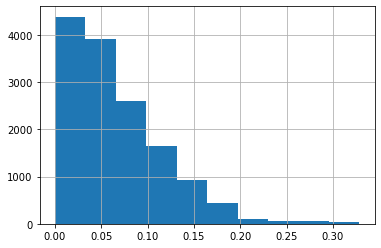

In [17]:
#plot hist to show item_visibility distribution
data['Item_Visibility'].hist()

In [18]:
#removing outliers from the distribution
Q1 = data['Item_Visibility'].quantile(0.25)
Q3 =data['Item_Visibility'].quantile(0.75)
IQR = Q3-Q1

In [19]:
fill_data = data.query('( @Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 +1.5*@IQR)')
fill_data.shape

(13943, 13)

In [20]:
data = fill_data

In [21]:
data['Item_Visibility'].describe()

count    13943.000000
mean         0.062629
std          0.045531
min          0.000000
25%          0.026768
50%          0.052708
75%          0.091369
max          0.193773
Name: Item_Visibility, dtype: float64

In [22]:
#convert numerical Item_visibility values to categorical values
data['Item_Visibility_bins'] = pd.cut(data['Item_Visibility'],[0.00,0.065,0.13,0.2],labels= ['Low Viz','Viz', 'High Viz'])

In [23]:
data['Item_Visibility_bins'].count()

13064

In [24]:
data['Item_Visibility_bins'].isnull().sum()

879

In [25]:
#fill missing visibility bins with Low Viz
data['Item_Visibility_bins']= data['Item_Visibility_bins'].replace(np.nan,'Low Viz',regex= True)

In [26]:
# Item_fat_content contain different types of fat contents. Let find the unique types
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
#There are different representations of categories in Item_fat_content
#replacing low fat with Low fat and reg with regular
data['Item_Fat_Content'] =data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
data['Item_Fat_Content'] =data['Item_Fat_Content'].replace('reg','Regular')

In [28]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
#convert all categorical variables to numeric using labelEncoder
le = LabelEncoder()

In [30]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Low Viz


In [31]:
#Transform Item_fat_content, Outlet_size,outlet_location_type and item_visibility bins
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])
data['Item_Visibility_bins'] = le.fit_transform(data['Item_Visibility_bins'])

In [32]:
data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_bins
1939,FDD35,12.150,0,0.025917,Starchy Foods,120.2440,OUT045,2002,1,1,Supermarket Type1,2277.0360,train,1
6982,FDD29,12.150,0,0.018439,Frozen Foods,254.7698,OUT049,1999,1,0,Supermarket Type1,5073.3960,train,1
1334,FDS15,9.195,1,0.078182,Meat,106.7596,OUT049,1999,1,0,Supermarket Type1,4098.6648,train,2
9058,FDF20,12.850,0,0.033408,Fruits and Vegetables,195.0768,OUT017,2007,1,1,Supermarket Type1,NaN,test,1
12483,FDC48,9.195,0,0.015924,Baking Goods,80.5592,OUT018,2009,1,2,Supermarket Type2,NaN,test,1
13515,DRF25,9.000,0,0.039145,Soft Drinks,38.6190,OUT017,2007,1,1,Supermarket Type1,NaN,test,1
12685,FDC11,20.500,0,0.142080,Starchy Foods,89.5172,OUT045,2002,1,1,Supermarket Type1,NaN,test,0
10527,NCW06,16.200,0,0.050419,Household,193.4162,OUT049,1999,1,0,Supermarket Type1,NaN,test,1
8774,FDX09,9.000,0,0.109214,Snack Foods,175.0370,OUT010,1998,1,2,Grocery Store,NaN,test,2
1165,FDP38,10.100,0,0.032284,Canned,52.2008,OUT017,2007,1,1,Supermarket Type1,759.0120,train,1


In [33]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [34]:
#create dummmies for outlet_type
dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [35]:
#check unique  values of item_identifier
data['Item_Identifier'].value_counts()

FDR07    10
FDY09    10
FDW01    10
FDU48    10
NCT18    10
         ..
FDO33     7
FDI46     7
FDM52     7
NCL42     7
NCQ17     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [36]:
#combining item_types using the first two letters
data['Item_Type_Combined'] =data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] =data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [37]:
data['Item_Type_Combined'].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [38]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Item_Visibility_bins           int32
Item_Type_Combined            object
dtype: object

In [39]:
#Perform one-hotEncoding for all columns
data = pd.get_dummies(data,columns =['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Item_Type_Combined','Outlet_Type'])

In [40]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Item_Type_Combined_Drinks              uint8
Item_Type_Combined_Food                uint8
Item_Type_Combined_Non-Consumable      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Typ

In [41]:
data['Outlet_Age']= 2018-data['Outlet_Establishment_Year']

In [42]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Age
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,19
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,9
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,19
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,3,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,20
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,3,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,31


In [43]:
import warnings
warnings.filterwarnings('ignore')

#drop columns which have been converted to different types
data.drop(['Item_Type','Outlet_Establishment_Year'],axis =1 ,inplace= True)

In [44]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Age
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,train,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,19
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,train,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,9
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,train,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,19
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,train,3,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,20
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,train,3,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,NaN,test,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,21
14200,FDD47,7.60,0.142991,169.1448,OUT018,NaN,test,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,9
14201,NCO17,10.00,0.073529,118.7440,OUT045,NaN,test,2,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,16
14202,FDJ26,15.30,0.000000,214.6218,OUT017,NaN,test,3,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,11


In [45]:
#divide data into train and test data and drop the source column
train = data.loc[data['source']=='train']
train.drop(['source'], axis =1, inplace = True)

test = data.loc[data['source']== 'test']
test.drop(['source','Item_Outlet_Sales'],axis =1, inplace = True)

In [46]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Age
0,FDA15,9.300,0.016047,249.8092,OUT049,3735.1380,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,19
1,DRC01,5.920,0.019278,48.2692,OUT018,443.4228,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,9
2,FDN15,17.500,0.016760,141.6180,OUT049,2097.2700,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,19
3,FDX07,19.200,0.000000,182.0950,OUT010,732.3800,3,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,20
4,NCD19,8.930,0.000000,53.8614,OUT013,994.7052,3,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,2778.3834,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,31
8519,FDS36,8.380,0.046982,108.1570,OUT045,549.2850,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,16
8520,NCJ29,10.600,0.035186,85.1224,OUT035,1193.1136,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,14
8521,FDN46,7.210,0.145221,103.1332,OUT018,1845.5976,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,9


In [47]:
#Export modified files
train.to_csv('train_modified.csv',index = False)
test.to_csv('test_modified.csv',index = False)

In [48]:
train2 = pd.read_csv('train_modified.csv')
test2 = pd.read_csv('test_modified.csv')

In [49]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Age
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,19
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,9
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,19
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,3,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,20
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,3,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,31


In [50]:
#create the independent variable
X_train = train2.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train2.Item_Outlet_Sales


In [51]:
#create the test dataset
X_test = test2.drop(['Item_Identifier','Outlet_Identifier'],axis =1)

In [52]:
#create train and test split
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [53]:
#fit linear model to the train dataset
lm = LinearRegression()
lm.fit(xtrain, ytrain)

LinearRegression()

In [54]:
#print intercept and coefficient of the model
print(lm.coef_)
print(lm.intercept_)

[-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -4.64698319e+00
 -1.55426303e+00  1.55426303e+00  5.39972452e+02 -3.11545503e+02
 -2.28426949e+02  1.88969149e+02  4.83874237e+01 -2.37356573e+02
  9.06454503e+00  3.46403369e+01 -4.37048820e+01 -1.63452944e+03
 -1.26820412e+02 -3.48655405e+02  2.11000526e+03 -3.19310190e+01]
946.4212171360755


In [55]:
#predict test set results
predictions = lm.predict(xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [56]:
#determine model performance using RMSE
print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.2352692434754


###### A good RMSE for this problem should be 1130, we can improve the RMSE by using decision tree or random forest.

In [57]:
#predict Outlet_sales of X_test dataset
y_sales_pred = lm.predict(X_test)
y_sales_pred

array([1788.81075495, 1593.90875193, 1845.79649796, ..., 1831.65421972,
       3605.8573969 , 1284.78769015])

In [58]:
test_predictions = pd.DataFrame({'Item_identifier':test2['Item_Identifier'],'Outlet_Identifier':test2['Outlet_Identifier'],
                                'Item_Outlet_Sales':y_sales_pred
                                })

In [59]:
test_predictions

,Item_identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.810755
1,FDW14,OUT017,1593.908752
2,NCN55,OUT010,1845.796498
3,FDQ58,OUT017,2675.927968
4,FDY38,OUT027,5134.091429
...,...,...,...
5563,FDB58,OUT046,2360.100059
5564,FDD47,OUT018,2419.143609
5565,NCO17,OUT045,1831.654220
5566,FDJ26,OUT017,3605.857397
